# Geospatial Urban Area Visualization and Analysis

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [3]:
path = '/Users/matthewmacbook/Documents/CareerFoundry/Data Immersion/Achievement 6 - Advanced Analytics and Dashboard Design/COVID-19 Public Transit Project'


In [4]:
# Import the recipes data

df_commuter_transit = pd.read_csv(os.path.join(path, 'Datasets', 'Transformed Data', 'commuter_transit_master_2018_to_2022.csv'))

In [5]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [6]:
# Import ".json" file for the U.S. urban areas 

urban_area_geo = os.path.join(path, 'urban_area_geo.json')


In [7]:
df_commuter_transit.tail(25)

,UZA Name,UACE Code,Year,Transit Trips,Transit Vehicle Miles,"Commute by Car, Truck, or Van",Commute by Drove alone,Commute by Carpooled,Commute by 2-person Carpool,Commute by 3-person Carpool,Commute by 4-or-more-person Carpool,Average Number of Workers per Car,Commute by Public Transportation,Commute by Walking,Commute by Bicycle,"Commute by Taxicab, Motorcycle, or Other means",Commute by Work from Home,Commute Time <10 Minutes,Commute Time 10 to 14 Minutes,Commute Time 15 to 19 Minutes,Commute Time 20 to 24 Minutes,Commute Time 25 to 29 Minutes,Commute Time 30 to 34 Minutes,Commute Time 35 to 44 Minutes,Commute Time 45 to 59 Minutes,Commute Time >60 Minutes,Mean Commute Time,Depart Time 12:00 a.m. to 4:59 a.m.,Depart Time 5:00 a.m. to 5:29 a.m.,Depart Time 5:30 a.m. to 5:59 a.m.,Depart Time 6:00 a.m. to 6:29 a.m.,Depart Time 6:30 a.m. to 6:59 a.m.,Depart Time 7:00 a.m. to 7:29 a.m.,Depart Time 7:30 a.m. to 7:59 a.m.,Depart Time 8:00 a.m. to 8:29 a.m.,Depart Time 8:30 a.m. to 8:59 a.m.,Depart Time 9:00 a.m. to 11:59 p.m.,Workers 16 Years and Over in Households,Households with 0 Vehicles available,Households with 1 Vehicle Available,Households with 2 Vehicles Available,Households with 3 or More Vehicles Available,Worked in State of Residence,Worked in County of Residence,Worked Outside County of Residence,Worked Outside State of Residence,Living in a Place,Worked in Place of Residence,Worked Outside Place of Residence,Not living in a place,Average Number of Vehicles per Household,Population,Housing Units,Land Area,Population Density
1558,"Worcester, MA--CT",97291,2022,3752543,3168489,76.8,68.8,8.0,6.1,1.0,1.0,1.06,1.7,2.2,0.2,2.8,16.3,12.8,14.0,13.3,13.9,7.4,13.4,7.9,7.2,10.2,26.7,5.3,3.8,6.1,8.7,11.8,13.2,10.5,11.5,5.8,23.4,246076,3.8,23.7,41.9,30.6,97.6,77.4,20.2,2.4,53.1,24.9,28.2,46.9,1.993,482085,196132,260.29,1852.1
1559,"Yakima, WA",97507,2018,1103595,1481138,93.3,85.3,8.0,6.3,0.4,1.3,1.05,0.3,2.0,0.7,2.0,1.6,17.0,22.8,26.3,12.2,3.7,8.1,2.9,4.4,2.7,18.4,8.9,5.4,8.3,5.8,10.4,13.3,14.5,5.9,4.9,22.6,56116,2.9,14.6,39.5,43.0,99.6,96.4,3.2,0.4,93.3,46.9,46.4,6.7,2.226,133145,51147,55.77,2387.4
1560,"Yakima, WA",97507,2019,1056918,1354889,95.4,83.5,11.9,9.1,1.6,1.2,1.07,0.6,0.7,0.2,1.1,2.0,19.3,23.4,24.4,12.5,3.2,9.8,2.7,1.5,3.0,18.1,8.3,6.7,6.9,10.0,11.4,11.1,13.7,10.3,2.8,18.8,56533,0.9,17.0,40.1,42.1,99.4,97.4,1.9,0.6,94.1,45.4,48.7,5.9,2.235,133145,51147,55.77,2387.4
1561,"Yakima, WA",97507,2020,591791,1075546,92.2,81.2,11.0,8.7,1.2,1.2,1.07,0.4,1.2,0.5,1.1,4.6,17.5,23.2,26.0,14.1,4.0,8.3,1.7,2.5,2.5,17.6,8.2,4.8,7.4,8.1,10.5,13.1,15.4,8.2,4.2,20.3,57318,1.3,16.6,39.6,42.4,99.6,97.5,2.1,0.4,93.1,46.2,47.0,6.9,2.230,133145,51147,55.77,2387.4
1562,"Yakima, WA",97507,2021,520862,1090830,89.2,76.3,12.9,9.4,1.2,2.4,1.09,0.1,1.3,0.5,0.5,8.4,19.4,20.1,23.9,13.6,6.8,7.7,2.0,2.3,4.2,19.6,5.6,5.2,7.8,9.9,9.1,17.0,17.3,5.8,3.8,18.5,53978,2.0,15.2,39.2,43.6,99.5,97.7,1.8,0.5,94.0,47.3,46.7,6.0,2.244,133145,51147,55.77,2387.4
1563,"Yakima, WA",97507,2022,513484,1115063,89.5,80.1,9.4,7.4,0.6,1.4,1.06,0.2,1.2,0.3,0.9,7.9,20.3,20.8,22.5,14.4,5.0,7.4,3.7,2.1,3.9,18.4,6.6,5.9,7.7,10.8,10.8,13.8,14.0,6.1,2.3,21.8,56289,1.7,17.3,34.7,46.3,99.9,96.3,3.7,0.1,93.7,49.8,44.0,6.3,2.256,133145,51147,55.77,2387.4
1564,"York, PA",97750,2018,2279125,7687775,91.6,80.3,11.3,9.3,1.4,0.6,1.07,1.1,1.6,0.3,1.1,4.3,12.3,15.3,19.1,16.7,6.4,9.3,6.3,7.4,7.1,24.3,5.8,5.0,7.4,8.7,10.6,13.3,9.2,7.7,4.6,27.8,113840,3.1,18.1,44.7,34.1,94.3,82.6,11.7,5.7,53.1,9.7,43.4,46.9,2.098,238549,97643,113.08,2109.6
1565,"York, PA",97750,2019,2214255,7937301,91.4,82.6,8.8,7.2,1.0,0.6,1.05,1.8,1.8,0.4,0.9,3.7,10.0,14.9,20.1,15.9,6.3,10.1,7.4,6.9,8.3,25.6,4.6,4.8,6.4,8.6,13.4,15.0,10.5,7.7,4.6,24.4,114561,3.4,19.0,44.3,33.4,94.0,81.3,12.7,6.0,55.6,7.9,47.7,44.4,2.078,238549,97643,113.08,2109.6
1566,"York, PA",97750,2020,1343116,5753932,90.4,81.6,8.8,7.4,0.8,0.5,1.05,1.3,1.9,0.3,0.7,5.5,12.6,15.3,18.4,15.7,7.4,9.3,5.7,7.3,8.4,24.9,5.9,4.4,6.3,9.6,11.1,13.8,10.4,8.3,4.2,26.0,1143

In [8]:
df_commuter_transit.shape

(1583, 55)

### 2. Data wrangling 

In [9]:
# Filter the data for the relevant years
df_filtered = df_commuter_transit[(df_commuter_transit['Year'] >= 2018) & (df_commuter_transit['Year'] <= 2019)]

# Calculate the average for 2018 and 2019
average_2018_2019 = df_filtered.groupby(['UZA Name', 'UACE Code'])[['Transit Trips', 'Commute by Work from Home']].mean()

# Filter the data for the years 2020-2022
df_filtered = df_commuter_transit[(df_commuter_transit['Year'] >= 2020) & (df_commuter_transit['Year'] <= 2022)]

# Calculate the average for 2020-2022
average_2020_2022 = df_filtered.groupby(['UZA Name', 'UACE Code'])[['Transit Trips', 'Commute by Work from Home']].mean()

# Calculate percentage change
df_percentage_change = ((average_2020_2022 - average_2018_2019) / average_2018_2019) * 100

# Reset index to have 'UZA Name' and 'UACE Code' as regular columns
df_percentage_change.reset_index(inplace=True)

# Display the resulting DataFrame
print(df_percentage_change)


                    UZA Name  UACE Code  Transit Trips  \
0                Abilene, TX        280            NaN   
1                  Akron, OH        766     -41.136796   
2                 Albany, GA        901     -49.320206   
3    Albany--Schenectady, NY        970     -24.843675   
4            Albuquerque, NM       1171     -46.338542   
..                       ...        ...            ...   
370               Yakima, WA      97507     -49.822504   
371                 York, PA      97750     -49.337945   
372           Youngstown, OH      97831     -29.539632   
373            Yuba City, CA      97939     -52.440938   
374             Yuma, AZ--CA      98020     -33.415011   

     Commute by Work from Home  
0                    28.318584  
1                   146.886447  
2                     2.727273  
3                   209.848485  
4                   203.370787  
..                         ...  
370                 287.037037  
371                 157.500000  
372   

In [10]:
df_percentage_change = df_percentage_change.rename(columns = {'Transit Trips': 'Transit Trips Change', 'Commute by Work from Home': 'Work from Home Change'})

### 3. Data cleaning

In [11]:
df_percentage_change.isnull().sum()

UZA Name                   0
UACE Code                  0
Transit Trips Change     109
Work from Home Change     50
dtype: int64

In [12]:
# Check for null values in the result DataFrame
null_rows = df_percentage_change[df_percentage_change.isnull().any(axis=1)]

null_rows

,UZA Name,UACE Code,Transit Trips Change,Work from Home Change
0,"Abilene, TX",280,NaN,28.318584
5,"Alexandria, LA",1279,NaN,105.031447
8,"Amarillo, TX",1927,NaN,134.567901
11,"Anderson, IN",2386,NaN,60.000000
12,"Anderson--Clemson, SC",2420,NaN,NaN
...,...,...,...,...
358,"Waterloo, IA",92593,NaN,51.333333
359,"Wausau, WI",93025,NaN,95.402299
364,"Williamsport, PA",95455,NaN,NaN
366,"Winchester, VA",96103,NaN,NaN


In [13]:
# Find unique "UZA Name" values in the null_rows DataFrame
unique_uza_names = null_rows['UZA Name'].unique()

# Print the unique "UZA Name" values
print(unique_uza_names)


['Abilene, TX' 'Alexandria, LA' 'Amarillo, TX' 'Anderson, IN'
 'Anderson--Clemson, SC' 'Atlantic City--Ocean City--Villas, NJ'
 'Auburn, AL' 'Bangor, ME' 'Battle Creek, MI' 'Bel Air--Aberdeen, MD'
 'Beloit, WI--IL' 'Benton Harbor--Lincoln--St. Joseph, MI' 'Bismarck, ND'
 'Bowling Green, KY' 'Bradenton--Sarasota--Venice, FL' 'Casper, WY'
 'Cheyenne, WY' 'Clarksville, TN--KY' 'Cleveland, TN' "Coeur d'Alene, ID"
 'Columbus, GA--AL' 'Daytona Beach--Palm Coast--Port Orange, FL'
 'Decatur, AL' 'Dothan, AL' 'Dubuque, IA--IL' 'El Centro, CA' 'Elmira, NY'
 'Fairbanks, AK' 'Florence, AL' 'Florence, SC' 'Fond du Lac, WI'
 'Fort Smith, AR--OK' 'Fredericksburg, VA' 'Gainesville, GA'
 'Galveston--Texas City, TX' 'Glens Falls, NY' 'Grand Junction, CO'
 'Greeley, CO' 'Hagerstown, MD--WV--PA--VA' 'High Point, NC'
 'Honolulu, HI' 'Houma, LA' 'Idaho Falls, ID' 'Ithaca, NY'
 'Janesville, WI' 'Jefferson City, MO' 'Johnstown, PA' 'Jonesboro, AR'
 'Kahului--Wailuku, HI' 'Kingsport, TN--VA' 'Kiryas Joel, NY' 

In [14]:
# Drop rows with null values from the df_percentage_change_dropped DataFrame
df_percentage_change_dropped = df_percentage_change.dropna()

# Reset the index after dropping rows
df_percentage_change_dropped.reset_index(drop=True, inplace=True)

In [15]:
df_percentage_change_dropped['UACE Code'] = df_percentage_change_dropped['UACE Code'].astype(str).str.zfill(5)

/var/folders/ft/cxfgrg_n3p1bcll_l0yy_z640000gn/T/ipykernel_15664/3821585227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_percentage_change_dropped['UACE Code'] = df_percentage_change_dropped['UACE Code'].astype(str).str.zfill(5)


In [16]:
df_percentage_change_dropped

,UZA Name,UACE Code,Transit Trips Change,Work from Home Change
0,"Akron, OH",00766,-41.136796,146.886447
1,"Albany, GA",00901,-49.320206,2.727273
2,"Albany--Schenectady, NY",00970,-24.843675,209.848485
3,"Albuquerque, NM",01171,-46.338542,203.370787
4,"Allentown--Bethlehem, PA--NJ",01495,-35.233491,168.913858
...,...,...,...,...
261,"Yakima, WA",97507,-49.822504,287.037037
262,"York, PA",97750,-49.337945,157.500000
263,"Youngstown, OH",97831,-29.539632,62.162162
264,"Yuba City, CA",97939,-52.440938,39.682540


In [17]:
df_percentage_change_dropped.describe()

,Transit Trips Change,Work from Home Change
count,266.000000,266.000000
mean,inf,137.665445
std,NaN,65.715241
min,-100.000000,-16.521739
25%,-49.711806,98.013382
50%,-43.201161,135.733636
75%,-33.787379,175.630517
max,inf,401.052632


<Axes: xlabel='Work from Home Change', ylabel='Count'>

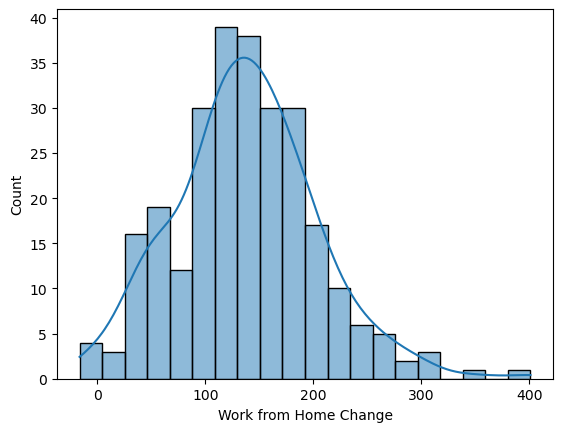

In [18]:
# shows extreme values for 'Work from Home Change'
sns.histplot(df_percentage_change_dropped['Work from Home Change'], bins=20, kde = True)

<Axes: xlabel='Transit Trips Change', ylabel='Count'>

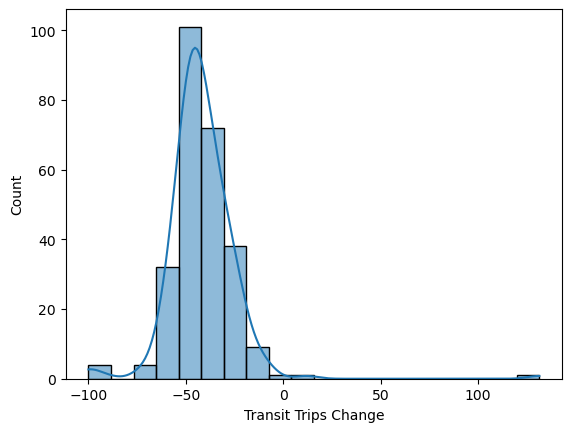

In [19]:
# shows extreme values for 'Transit Trips Change'
sns.histplot(df_percentage_change_dropped['Transit Trips Change'], bins=20, kde = True)

In [20]:
# Set a limit on 'Transit Trips Change' between -100 and 100
df_percentage_change_dropped['Transit Trips Change'].clip(lower=-70, upper=0, inplace=True)

# Set a limit on 'Work from Home Change' between -50 and 500
df_percentage_change_dropped['Work from Home Change'].clip(lower=0, upper=300, inplace=True)

/var/folders/ft/cxfgrg_n3p1bcll_l0yy_z640000gn/T/ipykernel_15664/2201725776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_percentage_change_dropped['Transit Trips Change'].clip(lower=-70, upper=0, inplace=True)
/var/folders/ft/cxfgrg_n3p1bcll_l0yy_z640000gn/T/ipykernel_15664/2201725776.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_percentage_change_dropped['Work from Home Change'].clip(lower=0, upper=300, inplace=True)


### 4. Plotting a choropleth map

The first visualization shows the percentage change in public transit trips taken from 2019 to 2020. <br>
For reference, in March of 2020, the US went into lockdown to prevent the spread of COVID-19. <br>

The second visualization will show the percentage change of work from home from 2018-2019 to 2020-2022 as companies allowed for more remote work across the country.

In [21]:
# Create a data frame with just the UACE code and the percentage change for transit trips we want plotted

data_to_plot_trips = df_percentage_change_dropped[['UACE Code','Transit Trips Change']]
data_to_plot_trips.head()

,UACE Code,Transit Trips Change
0,00766,-41.136796
1,00901,-49.320206
2,00970,-24.843675
3,01171,-46.338542
4,01495,-35.233491


In [22]:
# Create a data frame with just the UACE code and the percentage change for work from home we want plotted

data_to_plot_work_from_home = df_percentage_change_dropped[['UACE Code','Work from Home Change']]
data_to_plot_work_from_home.head()

,UACE Code,Work from Home Change
0,00766,146.886447
1,00901,2.727273
2,00970,209.848485
3,01171,203.370787
4,01495,168.913858


In [ ]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40, -100], zoom_start = 4)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = urban_area_geo, 
    data = data_to_plot_trips,
    columns = ['UACE Code', 'Transit Trips Change'],
    key_on = 'feature.properties.UACE20', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'PuRd_r', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Percent Change",
    bins=14,  # Set the number of bins
    reset=True  # Reset color scale for each feature
).add_to(map)
folium.LayerControl().add_to(map)

map

In [ ]:
# Setup a folium map at a high-level zoom
map_work_from_home = folium.Map(location = [40, -100], zoom_start = 4)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = urban_area_geo, 
    data = data_to_plot_work_from_home,
    columns = ['UACE Code', 'Work from Home Change'],
    key_on = 'feature.properties.UACE20', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'Blues', fill_opacity=0.7, line_opacity=0.1,
    legend_name = "Percent Change",
    bins=15,  # Set the number of bins
    reset=True  # Reset color scale for each feature
).add_to(map_work_from_home)
folium.LayerControl().add_to(map_work_from_home)

map_work_from_home

In [ ]:
map.save('map_transit_trips.html')

In [ ]:
map_work_from_home.save('map_work_from_home.html')

From the maps, we see that transit trips significantly decreased as the COVID-19 pandemic took hold. In contrast, work from home became more siginifcant as a large change of working from home is apparent from 2019 towards 2020 and beyond.